# PROJET DE MACHINE LEARNING     

## Code du groupe : 

## Introduction 


Ce projet s'inscrit dans le cadre de fin de cours de machine learning. Le problème posé est la prediction des cas de fraudes dans la transaction bancaire. Nous utiliserons des données issue d'une collecte banquaire qui décris les différents types de transaction, le temps mis, les montants de transaction et la variable "Class" qui décris s'il y a eu de fraude lors de la transaction ou pas.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn-whitegrid')
from sklearn import metrics, preprocessing, ensemble, model_selection
sns.set_palette("Set2")

# Chargement des données

In [86]:
data = pd.read_csv('creditcard.csv')

In [3]:
## Apperçues des 10 prémières lignes
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Description de nos données

In [48]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [49]:
## Taille des données
print(data.shape)
## Le nombre de ligne 
print("Le nombre de records de notre base de donnée est : " ,data.shape[0])
## Le nombre de variable
print("Le nombre de features de notre base de donnée est : " ,data.shape[1]-1)

(284807, 31)
Le nombre de records de notre base de donnée est :  284807
Le nombre de features de notre base de donnée est :  30


In [50]:
### Types de nos données

data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [51]:
## Vérifions si on a des valeurs manquantes
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Une vue globale

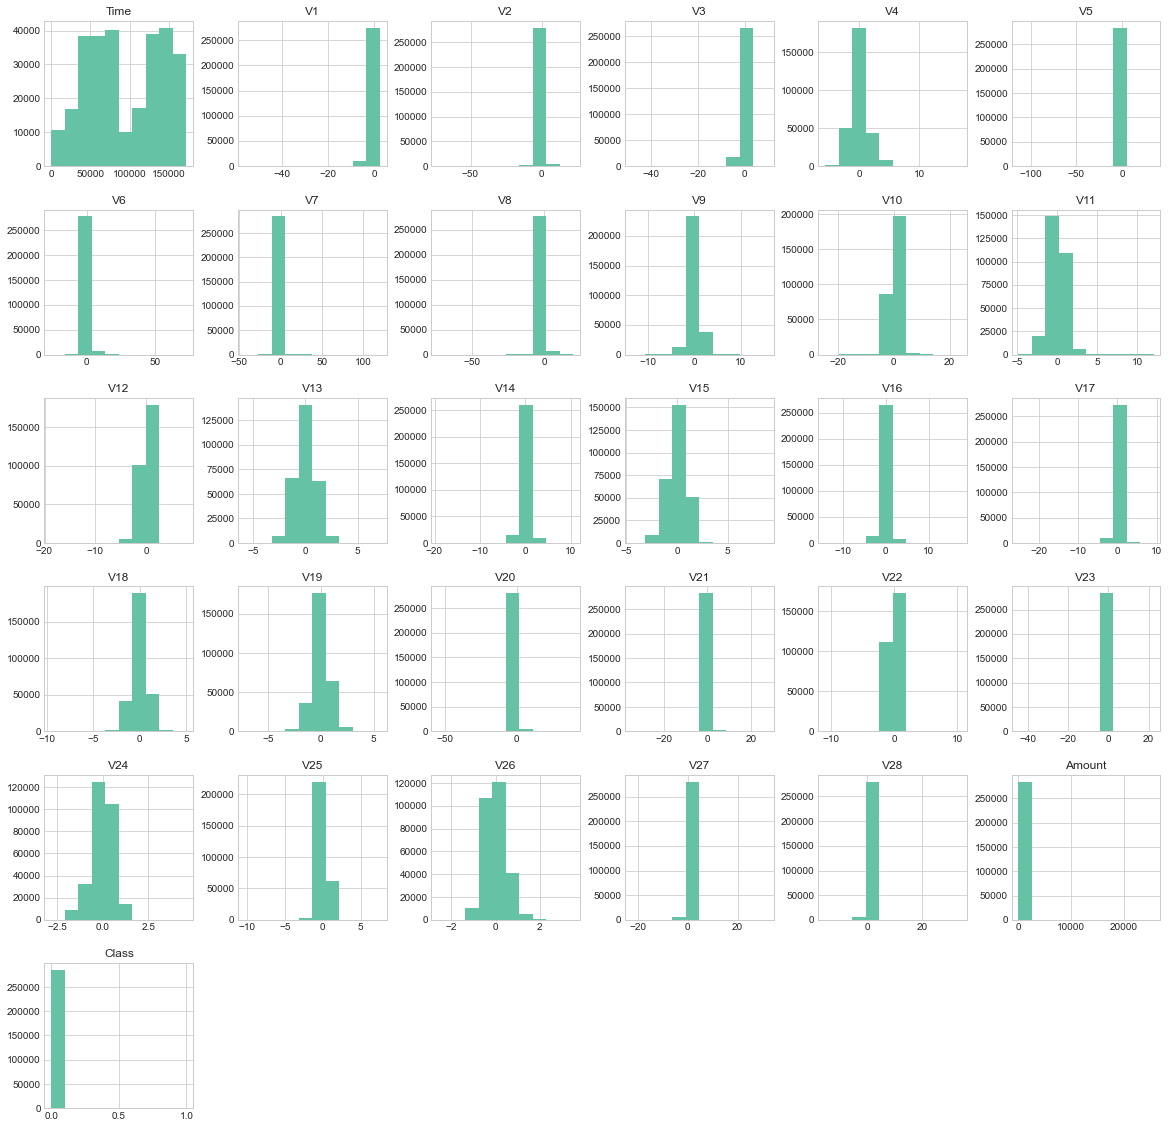

In [52]:
data.hist(figsize=(20,20))
plt.show()

### Particularité de la variable à prédire (Class)

In [53]:
nbr_non_frauder  =  len ( data [ data . Class  ==  0 ])
nbr_frauder  =  len ( data [ data . Class  ==  1 ])
pourcentage_frauder  =  round ( nbr_frauder  / nbr_non_frauder * 100 , 2 )
print('Le pourcentage de transaction fraudé est : ',pourcentage_frauder)
print('Le pourcentage de transaction non fraudé est : ',100-pourcentage_frauder)

Le pourcentage de transaction fraudé est :  0.17
Le pourcentage de transaction non fraudé est :  99.83


In [54]:
transaction_fraud = data[data['Class']==1]
transaction_normal = data[data['Class']==0]

In [55]:
print(transaction_fraud.shape,transaction_normal.shape)

(492, 31) (284315, 31)


In [56]:
transaction_fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [57]:
transaction_normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

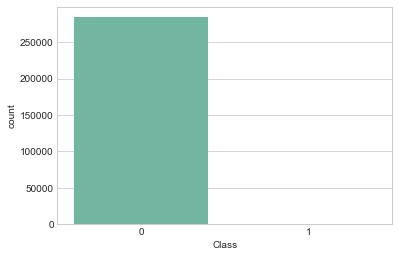

In [58]:
sns.countplot(x='Class',data=data)

# Matrice de corélation 

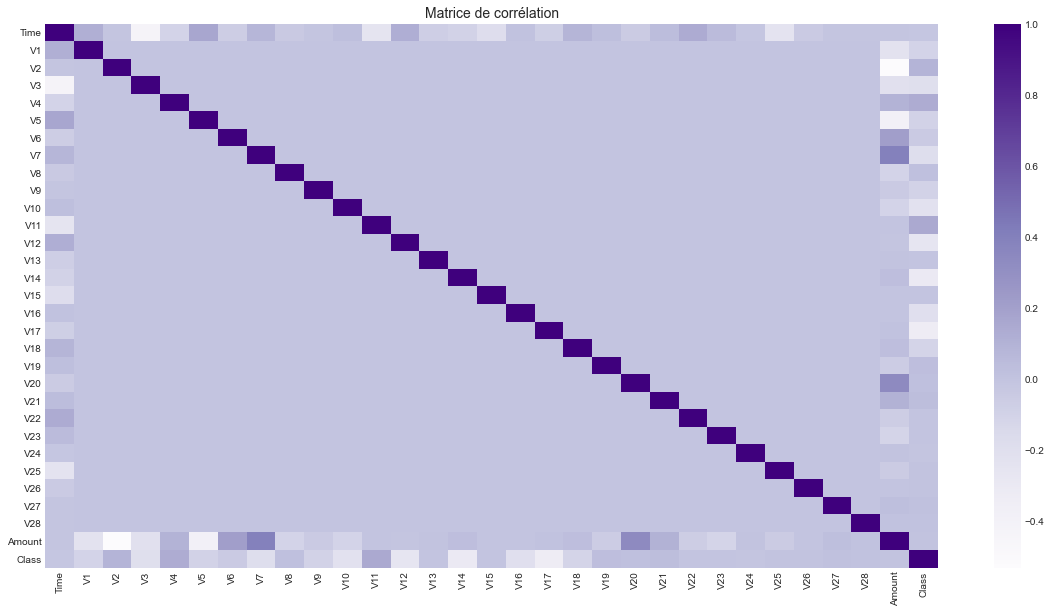

In [59]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = data.corr()
sns.heatmap(corr, cmap='Purples', annot_kws={'size':30}, ax=ax)
ax.set_title("Matrice de corrélation", fontsize=14)

plt.show()

## Corélation avec la variable cible

In [60]:
corr_matrix = data.corr()
class_corr = corr_matrix['Class']
class_corr.iloc[class_corr.abs().argsort()]

V22       0.000805
V23      -0.002685
V25       0.003308
V15      -0.004223
V26       0.004455
V13      -0.004570
Amount    0.005632
V24      -0.007221
V28       0.009536
Time     -0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6       -0.043643
V2        0.091289
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V4        0.133447
V11       0.154876
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Class     1.000000
Name: Class, dtype: float64

# Particularité des variables Time et Amount

<AxesSubplot:xlabel='Time', ylabel='Count'>

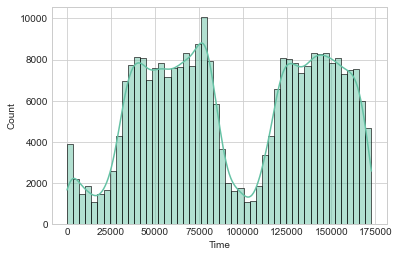

In [61]:
sns.histplot(data['Time'], bins=50, kde=True)

Text(0.5, 0, 'Amount')

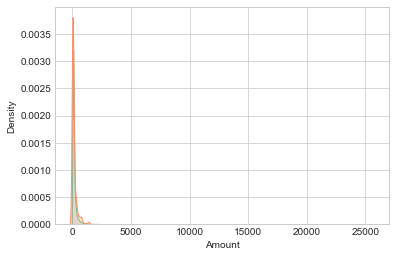

In [62]:
sns.kdeplot(data.Amount[data.Class == 0], label = 'Frauder', shade=True)
sns.kdeplot(data.Amount[data.Class == 1], label = 'NonFrauder', shade=True)
plt.xlabel('Amount')

# Normalisation des données

In [4]:
X=data.drop('Class',axis=1)
Y=data['Class']

In [5]:
X_scaler=(X-X.mean())/X.std()

In [65]:
X_scaler.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,...,0.326117,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,...,0.680974,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,...,-0.269855,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,...,0.529938,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403
5,-1.996537,-0.217474,0.581674,0.752584,-0.118833,0.305008,-0.022313,0.384935,0.217954,-0.517618,...,0.110215,-0.283522,-0.771426,-0.042273,-0.613272,-0.446583,0.219637,0.628899,0.245636,-0.338556
6,-1.996495,0.627794,0.085389,0.029923,0.849382,0.139019,0.204694,-0.004170,0.067997,0.423217,...,-0.284895,-0.228333,-0.373032,-0.246779,-1.287970,1.439034,-0.533435,0.085492,0.015656,-0.333278
7,-1.996432,-0.328928,0.858691,0.708575,-0.347630,0.687510,0.321345,0.905858,-3.188224,0.560128,...,-0.203317,2.645884,-1.399273,0.092085,-1.072752,-0.796632,-0.107075,-2.990148,-3.288077,-0.190107
8,-1.996432,-0.456572,0.173291,-0.074652,-0.191774,1.934146,2.793589,0.299205,0.712590,-0.356851,...,0.068406,-0.099963,-0.369424,-0.327055,1.670266,0.715942,-0.796632,0.029104,0.431419,0.019392
9,-1.996390,-0.172697,0.678004,0.688780,-0.156926,0.361791,-0.185218,0.526705,0.058223,-0.670586,...,0.264243,-0.336155,-0.873297,-0.193438,-0.635766,-0.133773,0.195341,0.610009,0.251681,-0.338516


# Préparation des données pour le premier cas d'étude

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.2,random_state=0,shuffle=True)

In [67]:
print("Les données de test et de train ce présentent comme:")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

Les données de test et de train ce présentent comme:
X_train:  227845
X_test:  56962
y_train:  227845
y_test:  56962


In [68]:
#Import des algorithmes et de la fonction de calcul du précision
#accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Forêt aléatoire

In [69]:
#FORET ALEATOIRES
foret_aleatoire= RandomForestClassifier()
foret_aleatoire.fit(X_train, y_train)
predictions = foret_aleatoire.predict(X_test)
print("Foret aléatoire: "+str(accuracy_score(predictions, y_test)))

Foret aléatoire: 0.9994908886626171


## Matrice de confusion

In [70]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,predictions)
confusion

array([[56854,     7],
       [   22,    79]], dtype=int64)

Text(37.5, 0.5, 'Predicted')

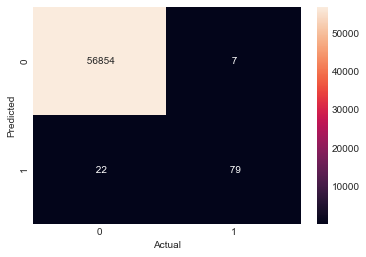

In [71]:
ax = sns.heatmap(confusion,fmt=' ',annot=True)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# SVM

In [72]:
#MACHINE VECTEURS DE SUPPORT
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [73]:
predictions = SVM.predict(X_test)
print("Machine vecteurs de support: "+str(accuracy_score(predictions, y_test)))

Machine vecteurs de support: 0.9993328885923949


De même que dans le cas des forêts aléatoires, nous avons un score très élévés pour les même raison.

## Matrice de confusion

In [74]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,predictions)
confusion

array([[56855,     6],
       [   32,    69]], dtype=int64)

Text(37.5, 0.5, 'Predicted')

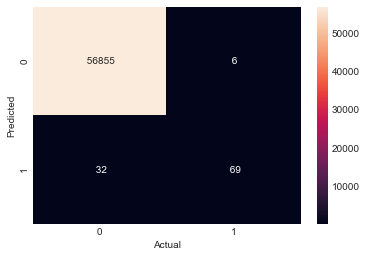

In [75]:
ax = sns.heatmap(confusion,fmt=' ',annot=True)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Reseau de neuronnes

In [299]:
import tensorflow as tf
from tensorflow import keras

## Optimiseur "adam"

In [77]:
model = keras.Sequential([
    keras.layers.Dense(29, input_shape=(30,), activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=10, batch_size=32)

Epoch 1/10
6409/6409 [==============================] - 5s 696us/step - loss: 0.0480 - accuracy: 0.9907 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 2/10
6409/6409 [==============================] - 4s 682us/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 3/10
6409/6409 [==============================] - 4s 683us/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 4/10
6409/6409 [==============================] - 5s 716us/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/10
6409/6409 [==============================] - 5s 713us/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 6/10
6409/6409 [==============================] - 5s 708us/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 7/10
6409/6409 [==============================] - 4s 693us/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0037 -

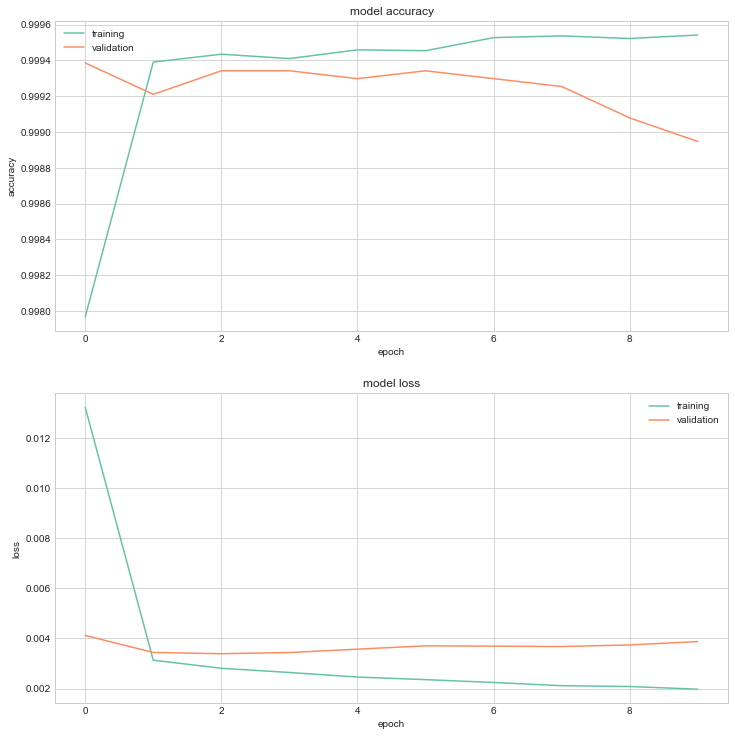

In [78]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [79]:
model.evaluate(X_test, y_test)

1781/1781 [==============================] - 1s 473us/step - loss: 0.0027 - accuracy: 0.9995


[0.0026702452450990677, 0.9995260238647461]

## Optimiseur "sgd"

In [80]:
model = keras.Sequential([
    keras.layers.Dense(29, input_shape=(30,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=10, batch_size=32)

Epoch 1/10
6409/6409 [==============================] - 5s 649us/step - loss: 0.0692 - accuracy: 0.9919 - val_loss: 0.0073 - val_accuracy: 0.9988
Epoch 2/10
6409/6409 [==============================] - 4s 618us/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 3/10
6409/6409 [==============================] - 4s 629us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 4/10
6409/6409 [==============================] - 4s 620us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 5/10
6409/6409 [==============================] - 4s 627us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 6/10
6409/6409 [==============================] - 4s 620us/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 7/10
6409/6409 [==============================] - 4s 624us/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0040 -

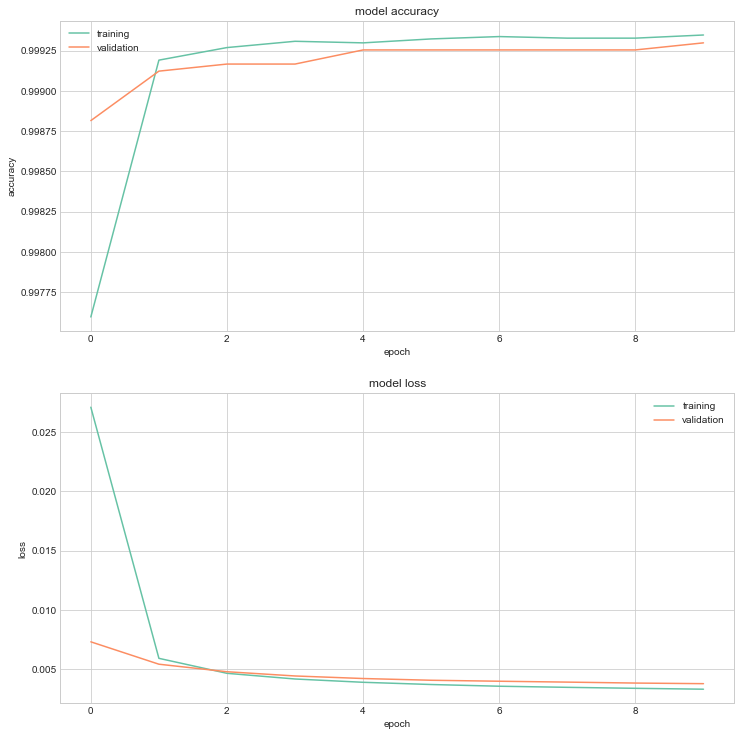

In [81]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [82]:
model.evaluate(X_test, y_test)

1781/1781 [==============================] - 1s 491us/step - loss: 0.0032 - accuracy: 0.9994


[0.0031721091363579035, 0.9993855357170105]

## Augmentation du nombre de couche et utilisation de adam

In [90]:
model = keras.Sequential([
    keras.layers.Dense(300,input_dim =30, activation = 'relu'),
    keras.layers.Dense(200,activation = 'relu'),
    keras.layers.Dense(150,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=10, batch_size=32)

Epoch 1/10
23/23 [==============================] - 3s 68ms/step - loss: 0.4086 - accuracy: 0.7151 - val_loss: 0.2185 - val_accuracy: 0.9241
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 0.1391 - accuracy: 0.9554 - val_loss: 0.3050 - val_accuracy: 0.9114
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 0.1185 - accuracy: 0.9525 - val_loss: 0.3055 - val_accuracy: 0.9114
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0702 - accuracy: 0.9729 - val_loss: 0.3960 - val_accuracy: 0.8987
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0778 - accuracy: 0.9688 - val_loss: 0.3329 - val_accuracy: 0.9114
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0437 - accuracy: 0.9782 - val_loss: 0.3435 - val_accuracy: 0.9114
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.9907 - val_loss: 0.3370 - val_accuracy: 0.9114
Epoch 8/10
23/23 [=

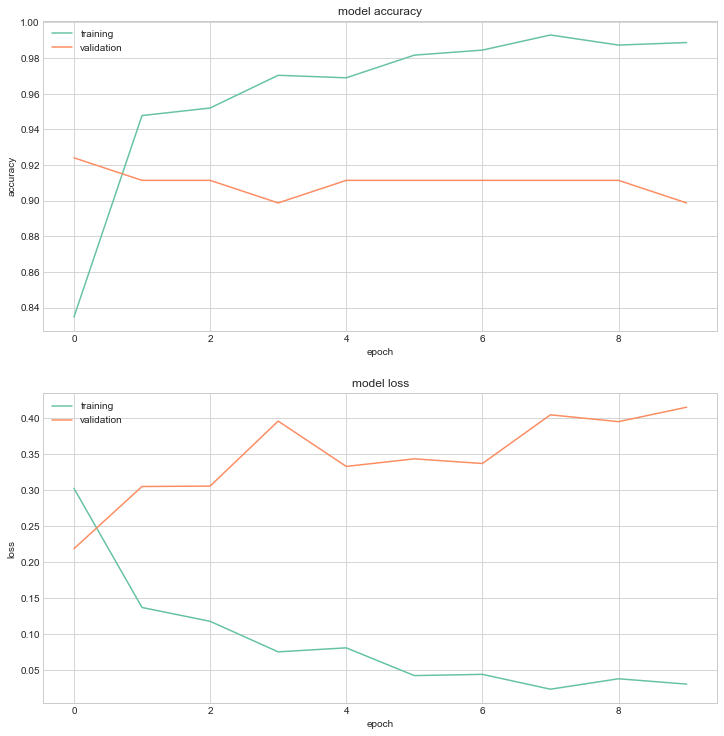

In [91]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

## Augmentation des couches et utilisation de sgd

In [92]:
model = keras.Sequential([
    keras.layers.Dense(300,input_dim =30, activation = 'relu'),
    keras.layers.Dense(200,activation = 'relu'),
    keras.layers.Dense(150,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=10, batch_size=32)

Epoch 1/10
23/23 [==============================] - 1s 23ms/step - loss: 0.5196 - accuracy: 0.6123 - val_loss: 0.4781 - val_accuracy: 0.6582
Epoch 2/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4169 - accuracy: 0.7685 - val_loss: 0.4229 - val_accuracy: 0.9367
Epoch 3/10
23/23 [==============================] - 0s 6ms/step - loss: 0.3814 - accuracy: 0.9388 - val_loss: 0.3739 - val_accuracy: 0.9367
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.3258 - accuracy: 0.9458 - val_loss: 0.3361 - val_accuracy: 0.9241
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.9334 - val_loss: 0.3054 - val_accuracy: 0.9241
Epoch 6/10
23/23 [==============================] - 0s 6ms/step - loss: 0.2712 - accuracy: 0.9267 - val_loss: 0.2803 - val_accuracy: 0.9367
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.2633 - accuracy: 0.9188 - val_loss: 0.2625 - val_accuracy: 0.9367
Epoch 8/10
23/23 [=

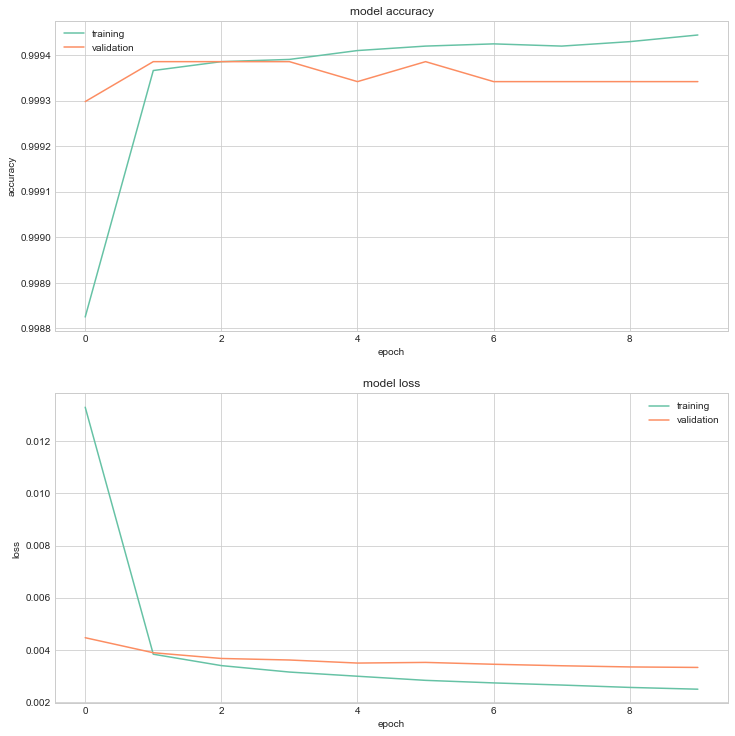

In [86]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

# Sous échantillonage de la variable class

In [110]:
# mélange aléatoire des données
shuffled_data = data.sample(frac=1,random_state=4)

# amount of fraud classes 492 rows.
fraud_data = shuffled_data.loc[shuffled_data['Class'] == 1]

#Randomly select 492 observations.
non_fraud_data = shuffled_data.loc[shuffled_data['Class'] == 0].sample(n=492,random_state=42)
normalized_data = pd.concat([fraud_data, non_fraud_data])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


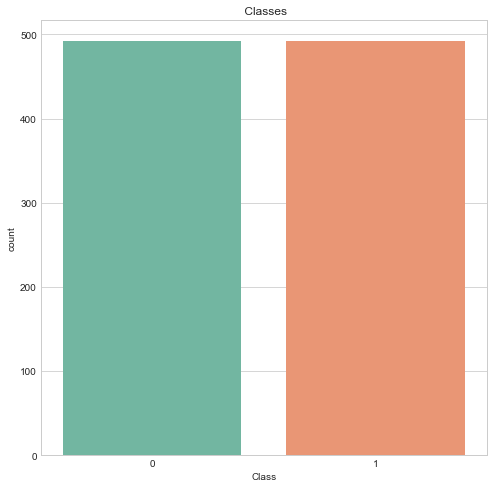

In [111]:
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=normalized_data)
plt.title(' Classes')
plt.show()

## Corelation


### Corélation avant sous échantillonage

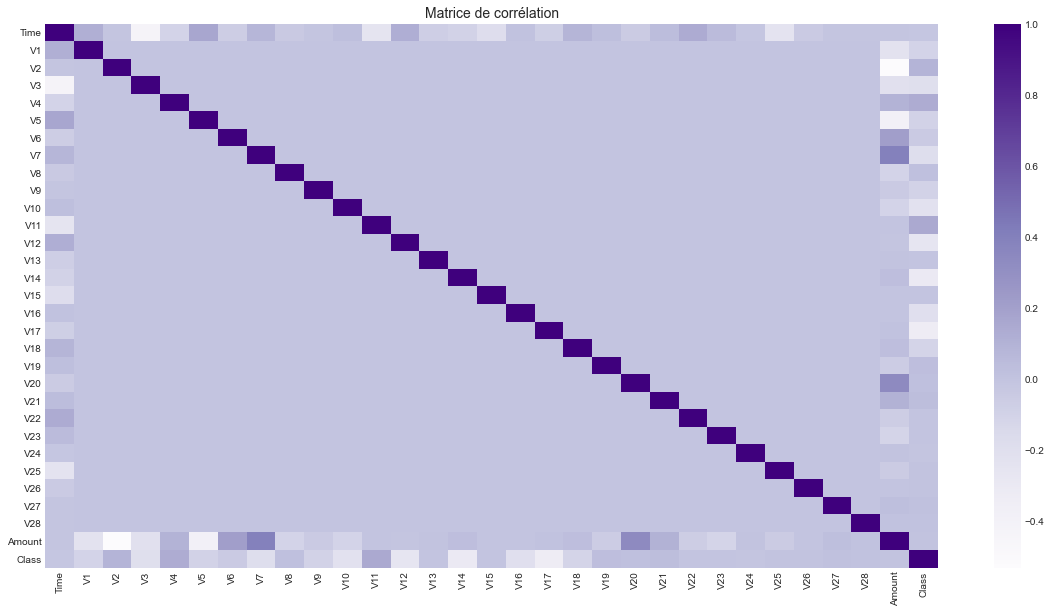

In [112]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = data.corr()
sns.heatmap(corr, cmap='Purples', annot_kws={'size':30}, ax=ax)
ax.set_title("Matrice de corrélation", fontsize=14)

plt.show()

In [113]:
corr_matrix = data.corr()
class_corr = corr_matrix['Class']
class_corr.iloc[class_corr.abs().argsort()]

V22       0.000805
V23      -0.002685
V25       0.003308
V15      -0.004223
V26       0.004455
V13      -0.004570
Amount    0.005632
V24      -0.007221
V28       0.009536
Time     -0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6       -0.043643
V2        0.091289
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V4        0.133447
V11       0.154876
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Class     1.000000
Name: Class, dtype: float64

### Corélation après sous échantillonage

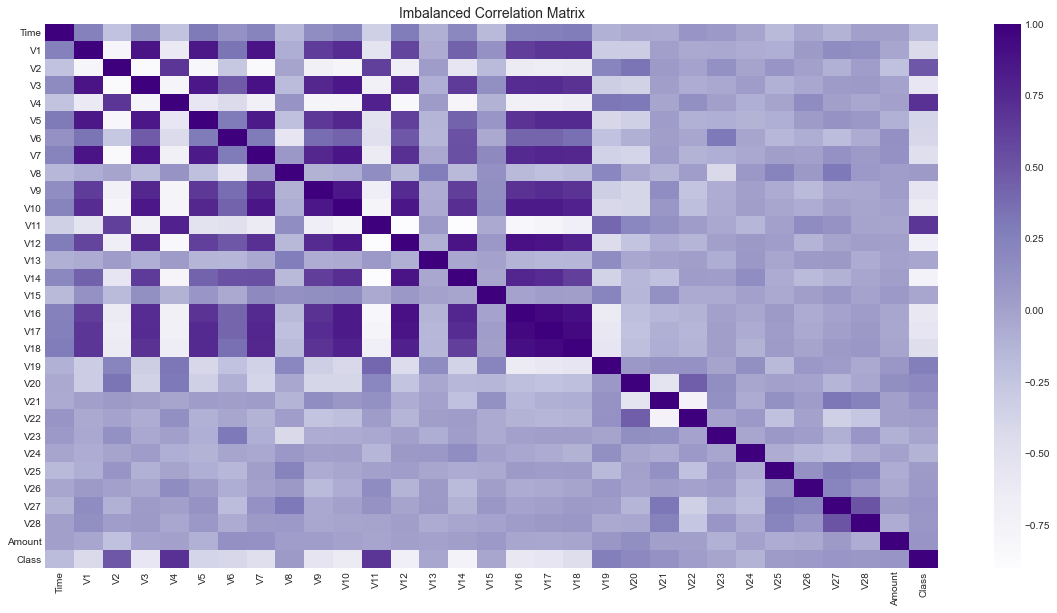

In [114]:

fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = normalized_data.corr()
sns.heatmap(corr, cmap='Purples', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [115]:
corr_matrix =  normalized_data.corr()
class_corr = corr_matrix['Class']
class_corr.iloc[class_corr.abs().argsort()]

V23      -0.023119
V15      -0.026967
V22       0.028455
V13      -0.029280
V25       0.044040
V8        0.055096
V26       0.072529
V28       0.082932
V27       0.090223
Amount    0.096184
V24      -0.118837
V21       0.124615
Time     -0.172435
V20       0.190462
V19       0.269950
V5       -0.382684
V6       -0.399432
V1       -0.429942
V18      -0.475094
V7       -0.477945
V2        0.494899
V9       -0.543646
V17      -0.557897
V3       -0.572655
V16      -0.591948
V10      -0.621863
V11       0.677983
V12      -0.681810
V4        0.703857
V14      -0.740414
Class     1.000000
Name: Class, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Count'>

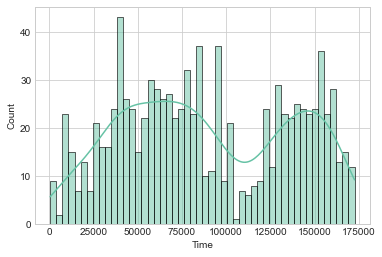

In [116]:
## Variable Time
sns.histplot(normalized_data['Time'], bins=50, kde=True)


Text(0.5, 0, 'Amount')

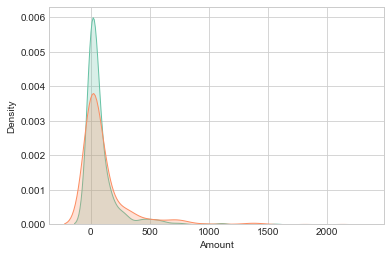

In [117]:
sns.kdeplot(normalized_data.Amount[data.Class == 0], label = 'Frauder', shade=True)
sns.kdeplot(normalized_data.Amount[data.Class == 1], label = 'NonFrauder', shade=True)
plt.xlabel('Amount')

In [118]:
data = normalized_data

In [119]:
cols_to_scale = ['Amount','Time']  ## variable à centrer et reduire

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

### Création des données dépendants et indépendants

In [120]:
columns = data.columns.tolist()
# Nous considérons les variables de notre base en déhors de la variable class
columns = [c for c in columns if c not in ["Class"]]
# La variable de prédiction 
target = "Class"
# Tirage aléatoire , nous fixons le state pour avoir les mêmes resultats toujours peut importe la compilation 
state = np.random.RandomState(64)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(984, 30)
(984,)


#### Echantillonage

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state= 0)
print("Les données de test et de train ce présentent comme:")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

Les données de test et de train ce présentent comme:
X_train:  787
X_test:  197
y_train:  787
y_test:  197


In [122]:
#Import des algorithmes et de la fonction de calcul du précision
#accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

 ## Forêt aléatoire

In [123]:
#FORET ALEATOIRES
foret_aleatoire= RandomForestClassifier()
foret_aleatoire.fit(X_train, y_train)
predictions = foret_aleatoire.predict(X_test)
print("Foret aléatoire: "+str(accuracy_score(predictions, y_test)))

Foret aléatoire: 0.9187817258883249


Text(37.5, 0.5, 'Predicted')

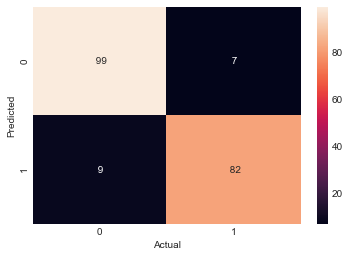

In [124]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,predictions)
confusion
ax = sns.heatmap(confusion,fmt=' ',annot=True)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

#### Optimisation

In [125]:
from  sklearn.model_selection import RandomizedSearchCV
state = np.random.RandomState(64)
# Nombre d'arbres dans la forêt aléatoire 
n_estimators = [int (x) for x in np.linspace (start = 1, stop = 10, num = 2)] 
# Nombre de fonctionnalités à considérer à chaque fractionnement 
max_features = ['auto', 'sqrt'] 
# Nombre maximum de niveaux dans l'arborescence 
max_depth = [int (x) for x in np.linspace (5, 10, num = 2)] 
max_depth.append (None) 
# Nombre minimum d'échantillons requis pour diviser un nœud 
min_samples_split = [2, 5, 10] 
# Nombre minimum d'échantillons requis à chaque nœud feuille 
min_samples_leaf = [1, 2, 4] 
# Méthode de sélection des échantillons pour l'apprentissage de chaque arbre 
bootstrap = [True, False]
# Créez la grille aléatoire 
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf 
               }
print (random_grid)

{'n_estimators': [1, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [126]:
# Utilisez la grille aléatoire pour rechercher les meilleurs hyperparamètres 
# Créez d'abord le modèle de base pour régler 
state = np.random.RandomState(64)
rf = RandomForestClassifier()
# Recherche aléatoire de paramètres, en utilisant la validation croisée 3 fois, 
# recherchez dans 100 combinaisons différentes et utilisez tous les cœurs disponibles 
rf_random = RandomizedSearchCV (estimator = rf, param_distributions=random_grid, n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)


In [127]:
# Ajuster le modèle de recherche aléatoire 
rf_random.fit (X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 10]},
                   random_state=42, verbose=2)

In [128]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(predictions, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [129]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

#### Model sans hyperparamettre ajusté

In [130]:
print("Foret aléatoire: "+str(accuracy_score(predictions, y_test)))

Foret aléatoire: 0.9187817258883249


#### Modèle avec hyperparamètre

In [131]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Accuracy = 0.93%.


## SVM

In [133]:
#MACHINE VECTEURS DE SUPPORT
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [134]:
predictions = SVM.predict(X_test)
print("Machine vecteurs de support: "+str(accuracy_score(predictions, y_test)))

Machine vecteurs de support: 0.9289340101522843


In [138]:
kernel = ['linear','rbf','poly']
for i in kernel:
    model = SVC(kernel=i,C=0.1)
    model.fit(X_train, y_train)
    print("Pour le Noyau: ",i)
    print("Le score est de: ",model.score(X_test,y_test))

Pour le Noyau:  linear
Le score est de:  0.934010152284264
Pour le Noyau:  rbf
Le score est de:  0.9390862944162437
Pour le Noyau:  poly
Le score est de:  0.8121827411167513


### Matrice de confusion

In [139]:
# definition de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Text(37.5, 0.5, 'Predicted')

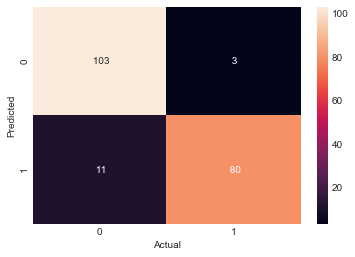

In [140]:
ax = sns.heatmap(cm,fmt=' ',annot=True)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

In [141]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       106
           1       0.96      0.88      0.92        91

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



 ## Reseau de neuronne

### Reseau de neuronne simple avec optimiseur "adam" 

In [300]:
import tensorflow as tf
from tensorflow import keras


In [301]:
state = np.random.RandomState(64)
model = keras.Sequential([
    keras.layers.Dense(29, input_shape=(30,), activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=10, batch_size=32)

Epoch 1/10
23/23 [==============================] - 1s 9ms/step - loss: 0.4908 - accuracy: 0.6799 - val_loss: 0.4075 - val_accuracy: 0.7848
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8240 - val_loss: 0.3583 - val_accuracy: 0.8481
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8460 - val_loss: 0.3266 - val_accuracy: 0.8861
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.9098 - val_loss: 0.3050 - val_accuracy: 0.8861
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.9252 - val_loss: 0.2861 - val_accuracy: 0.8987
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9418 - val_loss: 0.2728 - val_accuracy: 0.9114
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2147 - accuracy: 0.9377 - val_loss: 0.2633 - val_accuracy: 0.9114
Epoch 8/10
23/23 [==

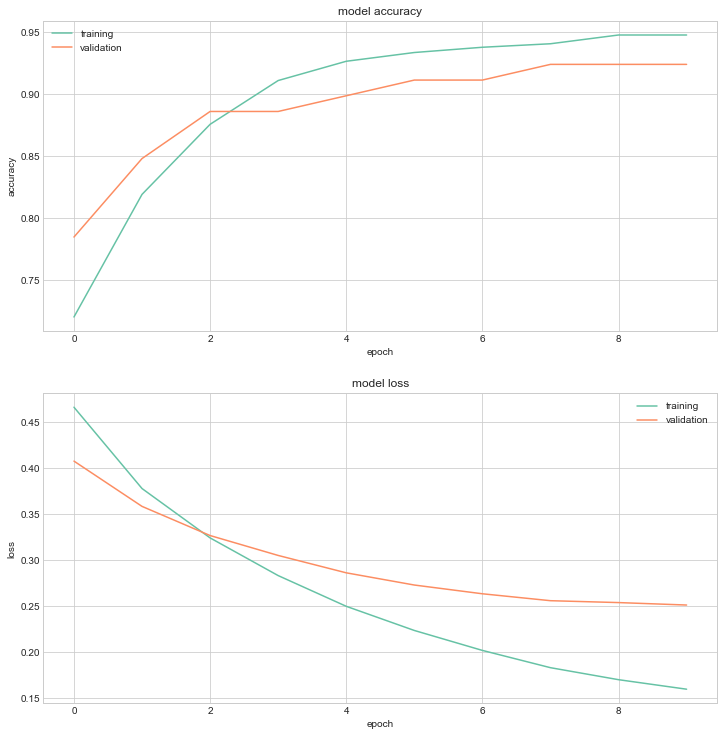

In [302]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [303]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.1801 - accuracy: 0.9137


[0.18009993433952332, 0.913705587387085]

### Reseau de neuronne simple avec optimiseur  "sgd"

In [326]:
model_sgd = keras.Sequential([
    keras.layers.Dense(29, input_shape=(30,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_sgd.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_sgd.fit(X_train,y_train, validation_split=0.10,
                    epochs=10, batch_size=32)

Epoch 1/10
23/23 [==============================] - 1s 17ms/step - loss: 0.5086 - accuracy: 0.6919 - val_loss: 0.5615 - val_accuracy: 0.5949
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7214 - val_loss: 0.5044 - val_accuracy: 0.7089
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.7931 - val_loss: 0.4615 - val_accuracy: 0.7722
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8303 - val_loss: 0.4254 - val_accuracy: 0.7975
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8378 - val_loss: 0.3991 - val_accuracy: 0.8354
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8901 - val_loss: 0.3730 - val_accuracy: 0.8481
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8771 - val_loss: 0.3541 - val_accuracy: 0.8734
Epoch 8/10
23/23 [=

In [327]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 843us/step - loss: 0.2739 - accuracy: 0.9137


[0.27388402819633484, 0.913705587387085]

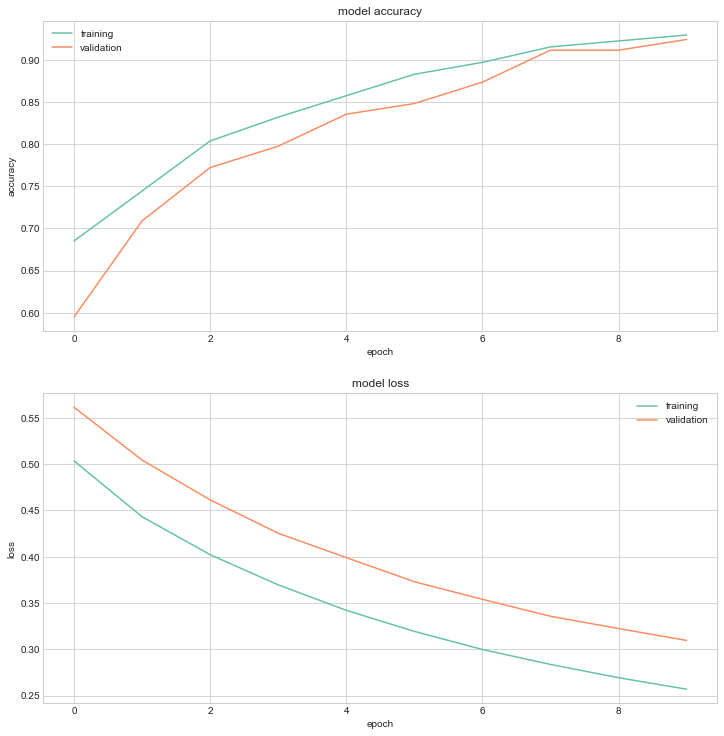

In [328]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

Dans le cas simple nous remarquons que le choix de l'optimiseur "sgd" à la place de "adam" améliore le score. Dans la suite nous allons augmenter les couches en utilisant l'optimiseur "sgd" et voir si nous pouvions améliorer notre modèle.

### Augmentation des couches et utilisation de "sgd"

In [332]:
model1 = keras.Sequential([
    keras.layers.Dense(300,input_dim =30, activation = 'relu'),
    keras.layers.Dense(200,activation = 'relu'),
    keras.layers.Dense(150,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model1.fit(X_train,y_train, validation_split=0.10,
                    epochs=10, batch_size=32)

Epoch 1/10
23/23 [==============================] - 1s 9ms/step - loss: 0.5794 - accuracy: 0.5316 - val_loss: 0.5157 - val_accuracy: 0.5443
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.6540 - val_loss: 0.4670 - val_accuracy: 0.7848
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8318 - val_loss: 0.4246 - val_accuracy: 0.8987
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.9275 - val_loss: 0.3933 - val_accuracy: 0.9241
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3430 - accuracy: 0.9232 - val_loss: 0.3598 - val_accuracy: 0.9367
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.9208 - val_loss: 0.3319 - val_accuracy: 0.9367
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3003 - accuracy: 0.9329 - val_loss: 0.3105 - val_accuracy: 0.9367
Epoch 8/10
23/23 [==

In [330]:
model1.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 100)               3100      
_________________________________________________________________
dense_236 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_237 (Dense)            (None, 10)                510       
_________________________________________________________________
dense_238 (Dense)            (None, 15)                165       
_________________________________________________________________
dense_239 (Dense)            (None, 1)                 16        
Total params: 8,841
Trainable params: 8,841
Non-trainable params: 0
_________________________________________________________________


In [333]:
model1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 0s/step - loss: 0.2486 - accuracy: 0.9239


[0.24864858388900757, 0.9238578677177429]

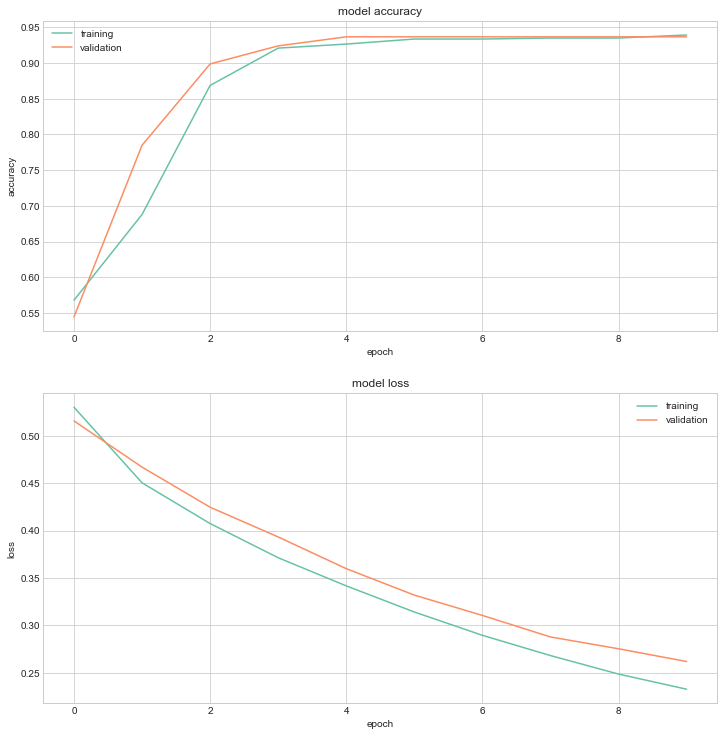

In [334]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [336]:
yp = model.predict(X_test)
yp[:5]

array([[0.9975361 ],
       [0.2195968 ],
       [0.9961697 ],
       [0.25889772],
       [0.22983384]], dtype=float32)

In [337]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [338]:
y_pred[:10]

[1, 0, 1, 0, 0, 1, 1, 0, 0, 0]

In [339]:
y_test[:10]

203700    1
199427    0
93424     1
274402    0
184663    0
143334    1
226814    1
147880    0
110368    0
88523     0
Name: Class, dtype: int64

In [340]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       106
           1       0.90      0.91      0.91        91

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



Text(73.5, 0.5, 'Truth')

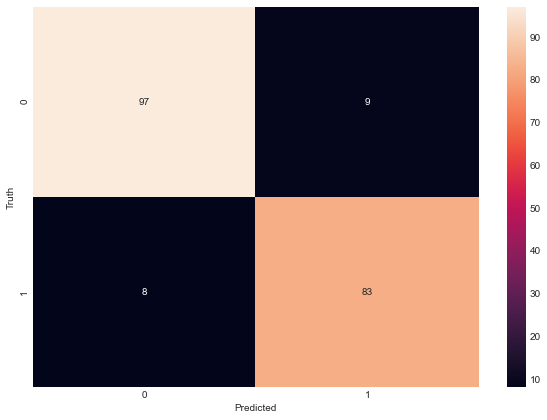

In [341]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



# Conclusion

Dans ce projet nous avons présenté deux cas d'étude du problème de prédiction de fraude banquaire en utulisant les modèles de classification: Random forest, svm et reseau de neuronnes. Le choix de deux cas d'études à été motivé par le fait d'avoir deux classes de donnée désiquilibré. Dans le premier cas d'étude notre modèle présente de très bon score  mais en terme de prédiction il  a tendence à prédire plus les classe de 0(les transactions non fraudées) au détriment de 1(les transactions fraudées). Avec le sous échantillonage nous obtenons un score de 93 % pour les différents modèle optimiser, et la prediction des différentes classe est meilleurs. En restant plus prudent adopté un modèle de random forest ou svm ou à reseau de neuronne(couche multiple avec "sgd") s'emble le mieux adapté pour la prédiction de fraude de transaction.